## **Importing the libraries**





In [ ]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

## **Loading the Dataset**

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.head()

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Actual duration,Development type,...,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
0,1,2015,1,1,1,16,7,13,3.0,1,...,?,1,3,1,1,1,2,2,3,1
1,2,2016,25,5,1,2,1,2,3.0,1,...,2,2,2,1,4,1,1,4,2,1
2,3,2008,2,5,3,2,2,3,5.0,1,...,3,2,2,2,3,4,3,5,2,3
3,4,2009,42,4,2,3,2,4,6.0,1,...,1,1,3,4,3,2,4,3,4,2
4,5,2016,42,4,2,3,2,4,24.0,1,...,1,1,3,4,3,4,3,3,4,2


# Peprocessing

### `Exploring the descriptive statistics of the variables`

In [ ]:
data.describe(include='all')

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Actual duration,Development type,...,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
count,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120,120,120,120,120,120,120,120,120,120
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,5,5,6,5,5,6,5,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,3,3,4,1,1,2,2,2,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76,32,52,63,41,70,55,63,35,63
mean,60.500000,2011.958333,17.141667,4.550000,1.97500,7.841667,4.366667,7.941667,10.375000,1.516667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,34.785054,6.267692,13.150899,1.358756,1.05689,6.201106,4.134165,4.784948,8.903604,0.987173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1993.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.500000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,30.750000,2008.750000,6.000000,4.000000,1.00000,3.000000,1.000000,3.000000,5.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,60.500000,2014.000000,11.500000,5.000000,2.00000,4.500000,2.000000,10.000000,8.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,90.250000,2017.000000,26.250000,5.000000,2.00000,16.000000,8.000000,13.000000,12.000000,1.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 70 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ProjID                                          120 non-null    int64  
 1   Year of project                                 120 non-null    int64  
 2   Organization id                                 120 non-null    int64  
 3   Organization type                               120 non-null    int64  
 4   Role in organization                            120 non-null    int64  
 5   Size of organization                            120 non-null    int64  
 6   Size of IT department                           120 non-null    int64  
 7   Customer organization type                      120 non-null    int64  
 8   Actual duration                                 120 non-null    float64
 9   Development type                           

# Check for any missing values and treat it

In [ ]:
# data = data.replace('?', np.nan)
# data = data.replace('N/A', np.nan)
# data = data.dropna()

In [ ]:
df=data.copy()
# df = df.replace('?', '1')
df.isna().sum()

ProjID                      0
Year of project             0
Organization id             0
Organization type           0
Role in organization        0
                           ..
Performance requirements    0
Product complexity          0
Security requirements       0
Reliability requirements    0
Specified H/W               0
Length: 70, dtype: int64

In [ ]:
df = df.replace(['?', 'N/A'], np.nan)  # Replace '?' and 'N/A' with NaN
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
df = df.fillna(data.mean())

In [ ]:
df_no_mv = df.dropna()
df_no_mv = df_no_mv.dropna().reset_index(drop=True)

In [ ]:
df_no_mv.describe()

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Actual duration,Development type,...,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,63.000000,2011.705263,18.600000,4.578947,1.936842,7.842105,4.168421,7.568421,9.689474,1.368421,...,1.915789,2.421053,2.336842,2.778947,2.463158,1.684211,2.126316,2.526316,2.484211,1.515789
std,35.330958,6.356223,13.845961,1.395883,0.872884,6.301496,4.030872,4.523350,8.207475,0.838599,...,1.277157,1.106835,0.894552,1.354103,1.218741,0.992130,0.970217,1.070316,1.156509,0.682036
min,2.000000,1993.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,31.500000,2008.000000,6.000000,4.000000,1.500000,3.000000,1.000000,3.000000,5.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.500000,1.000000
50%,66.000000,2014.000000,14.000000,5.000000,2.000000,4.000000,2.000000,7.000000,7.000000,1.000000,...,1.000000,2.000000,2.000000,4.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000
75%,92.500000,2017.000000,30.500000,5.000000,2.000000,16.000000,6.000000,13.000000,12.000000,1.000000,...,3.000000,3.000000,3.000000,4.000000,3.500000,2.000000,3.000000,3.000000,4.000000,2.000000
max,120.000000,2019.000000,45.000000,8.000000,7.000000,17.000000,12.000000,16.000000,48.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000


In [ ]:
df_no_mv = df_no_mv.drop('ProjID', axis=1)
df_no_mv = df_no_mv.dropna().reset_index(drop=True)
df_no_mv = df_no_mv.drop('Year of project', axis=1)
df_no_mv = df_no_mv.reset_index(drop=True)

In [ ]:
df_no_mv.head()

,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Actual duration,Development type,Application domain,Object points,...,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
0,25,5,1,2,1,2,3.0,1,3,19.0,...,2.0,2.0,2.0,1.0,4.0,1.0,1.0,4.0,2.0,1.0
1,2,5,3,2,2,3,5.0,1,3,64.0,...,3.0,2.0,2.0,2.0,3.0,4.0,3.0,5.0,2.0,3.0
2,42,4,2,3,2,4,6.0,1,7,246.0,...,1.0,1.0,3.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0
3,42,4,2,3,2,4,24.0,1,7,420.0,...,1.0,1.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,2.0
4,42,4,2,3,2,4,8.0,4,7,177.0,...,1.0,1.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,2.0


In [ ]:
# df_no_mv = df_no_mv.replace(' ? ','1')
# # df_no_mv = df_no_mv.replace('N/A', np.nan)
df_no_mv = df_no_mv.dropna()
df_no_mv=df_no_mv.dropna().reset_index(drop=True)

# **Feature Selection**

In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = df_no_mv.drop('Actual effort',axis=1)
y = df_no_mv['Actual effort']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

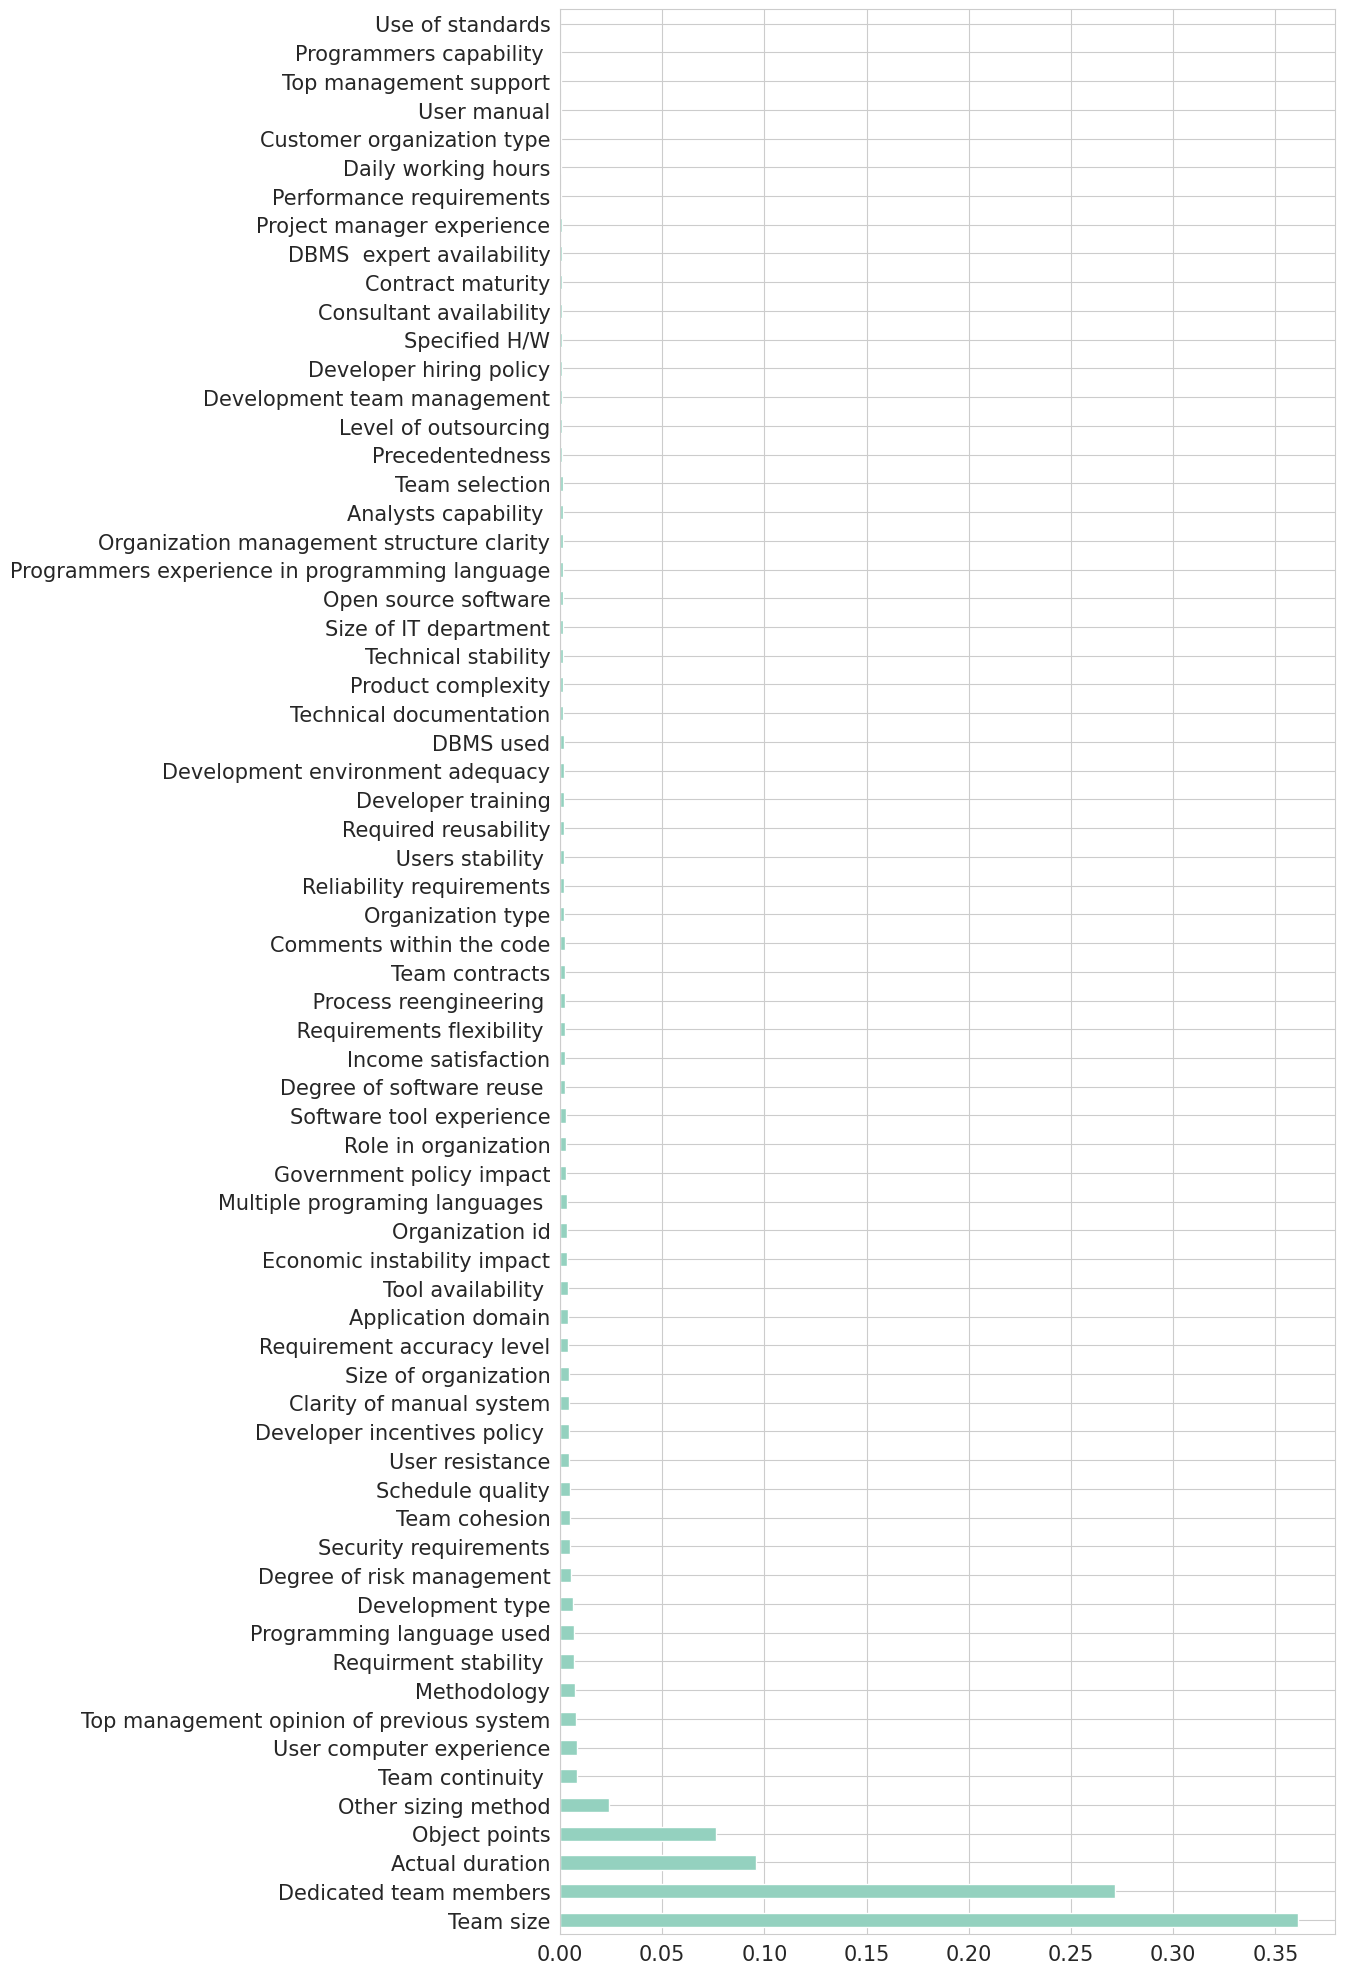

In [ ]:
plt.figure(figsize=[10,25])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.tick_params(labelsize=15)
feat_importances.nlargest(69).plot(kind='barh')
plt.show()

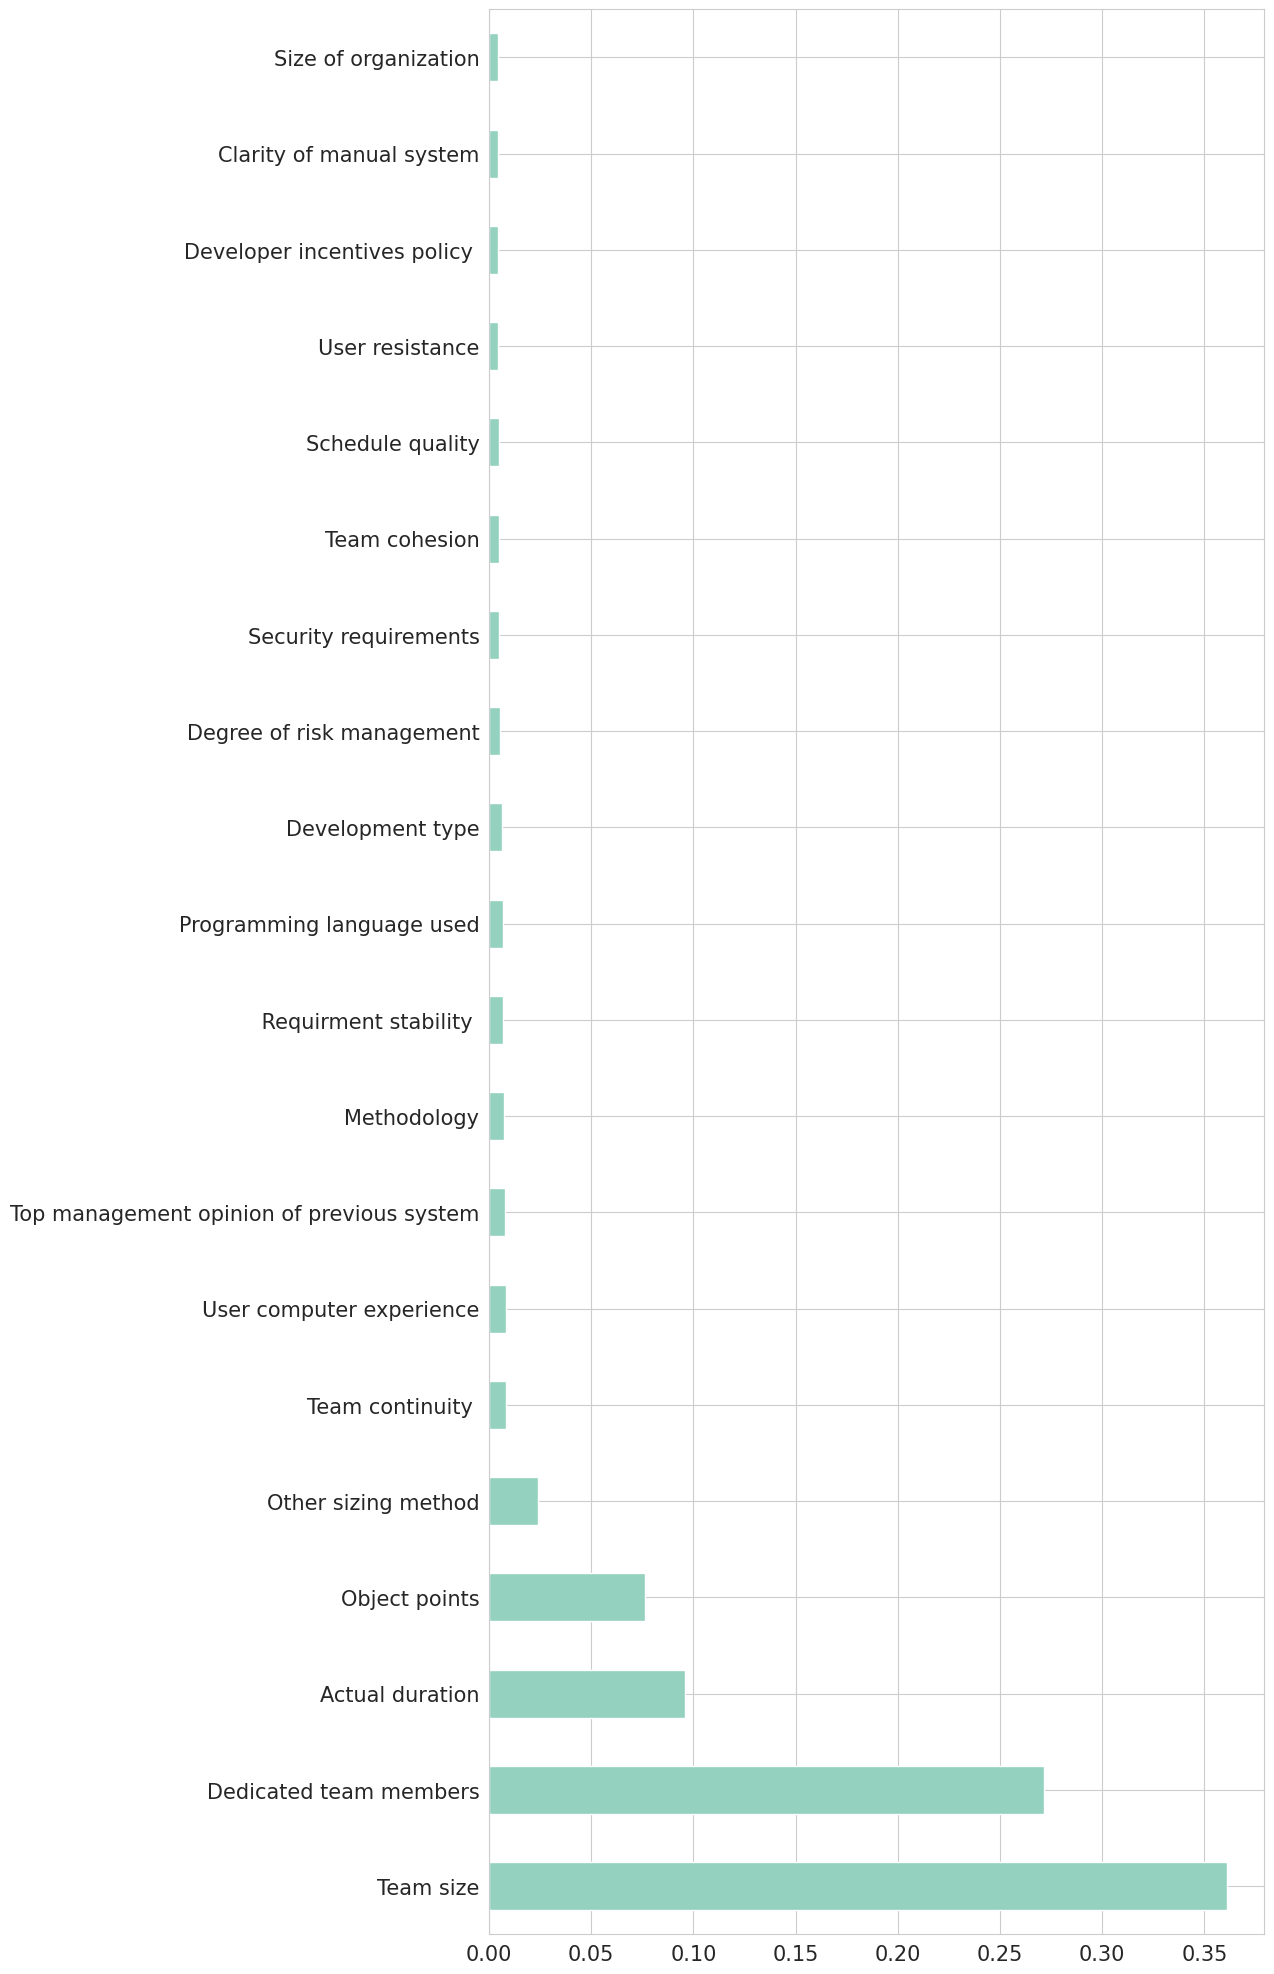

In [ ]:
plt.figure(figsize=[10,15])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.tick_params(labelsize=15)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Selecting the top 20 features**

In [ ]:
top_features = feat_importances.nlargest(20).index
x = X[top_features]

In [ ]:
categorical_columns =x.select_dtypes(include=['object']).columns

<Axes: >

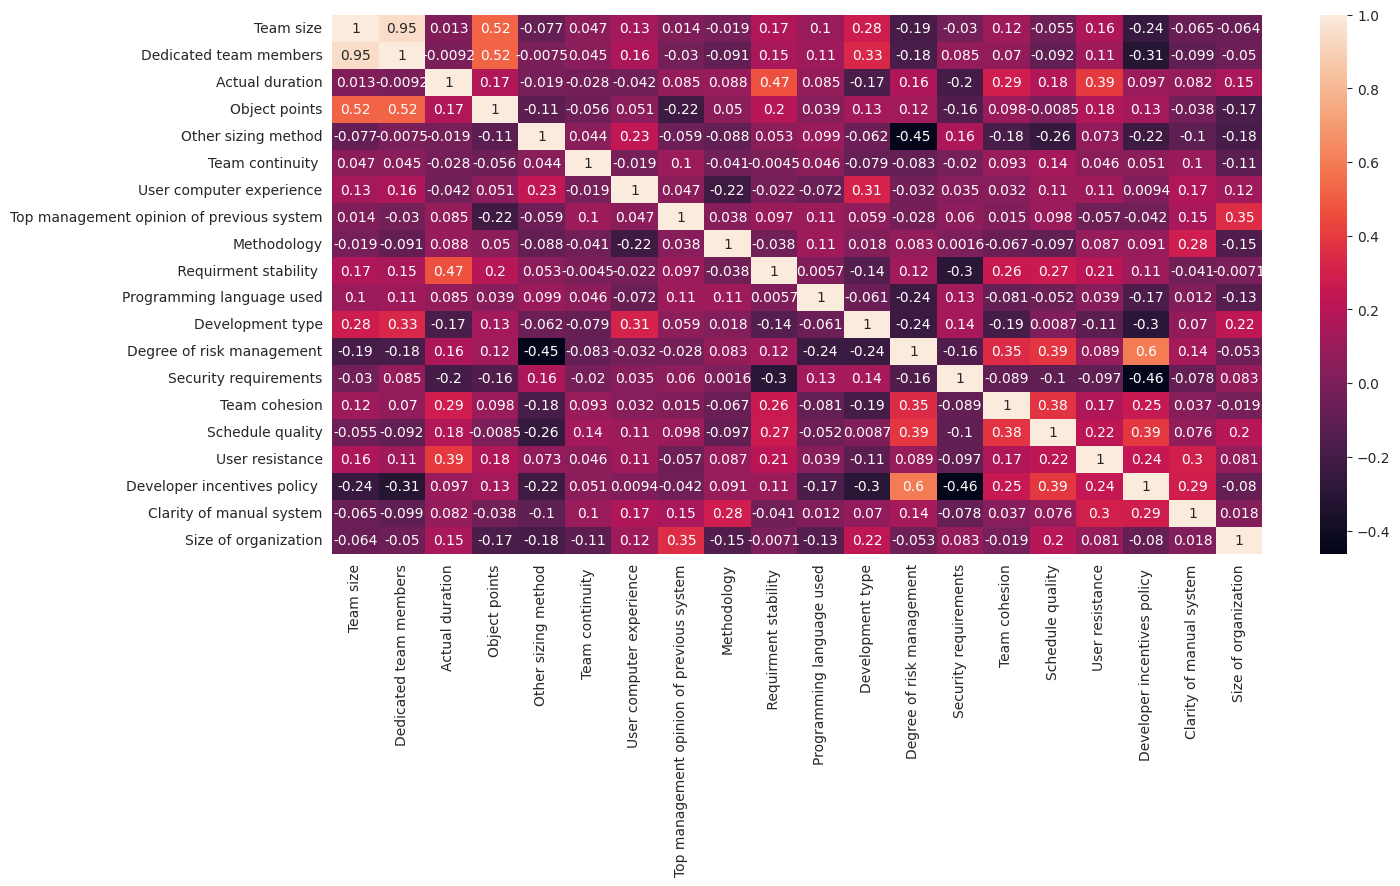

In [ ]:
plt.figure(figsize=[15,7])
sns.heatmap(x.corr(), annot=True)

# **Encoding the columns**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x[categorical_columns])

x_train1 = x.drop(categorical_columns, axis=1)

x_train1 = pd.concat([x_train1, pd.DataFrame(x_encoded.toarray())], axis=1)

In [ ]:
print(x_train1.shape)

(95, 20)


**Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=365)

In [ ]:
x_test = x_test.drop(x_test.index[5])
x_test = x_test.reset_index(drop=True)

y_test = y_test.drop(y_test.index[5])
y_test = y_test.reset_index(drop=True)

# **Random Forest Regressor**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

regressor = RandomForestRegressor(n_estimators=1500, random_state=42)

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score",metrics.r2_score(y_test,y_pred))

rfr_pred=y_pred

MAE: 1617.5055925925928
MSE: 6713766.683265346
RMSE: 2591.0937233657423
r2_score 0.8769594142458828


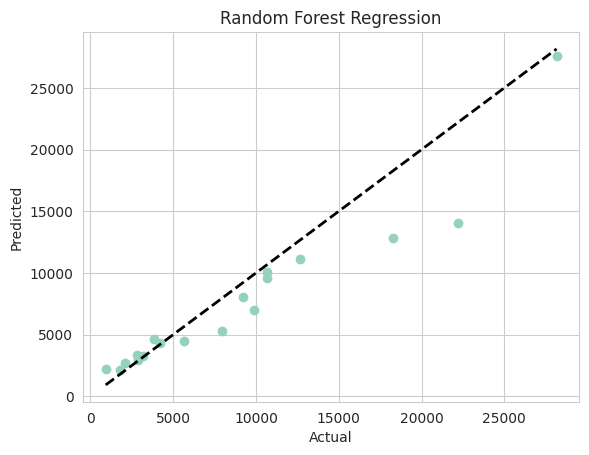

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values for Linear Regression
plt.scatter(y_test, rfr_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.show()

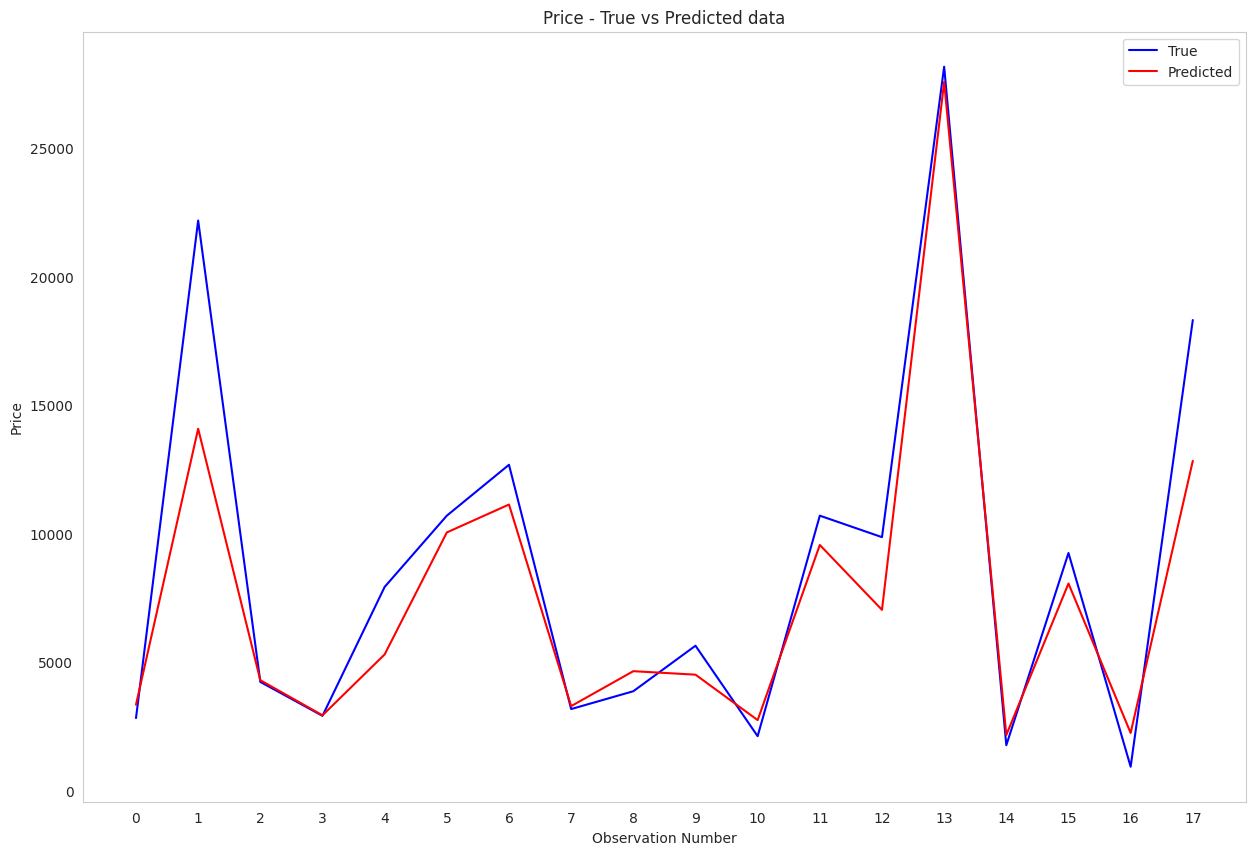

In [ ]:
gap=1

train_seg=y_test[::gap]
pred_seg=rfr_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(15,10))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

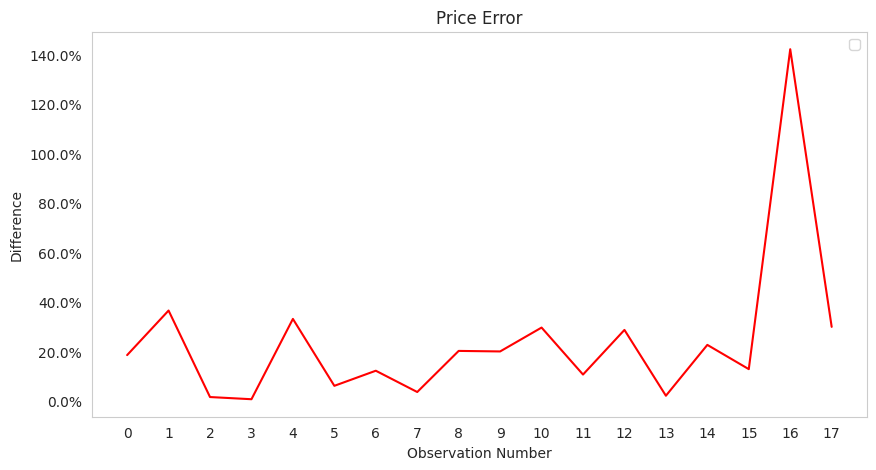

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(rfr_pred, columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = y_test

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

gap=1
x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train1,y,test_size=0.2, random_state=365)

In [ ]:
x_test = x_test.drop(x_test.index[5])
x_test = x_test.reset_index(drop=True)

y_test = y_test.drop(y_test.index[5])
y_test = y_test.reset_index(drop=True)

# **XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgboost_model = xgb.XGBRegressor()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, error_score='raise',cv=10)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the full training set

best_xgboost_model = xgb.XGBRegressor(colsample_bytree= best_params['colsample_bytree'], learning_rate= best_params['learning_rate'], max_depth= best_params['max_depth'], n_estimators=best_params['n_estimators'], subsample= best_params['subsample'])


best_xgboost_model.fit(x_train, y_train)

y_pred = best_xgboost_model.predict(x_test)

  # print(i , metrics.mean_absolute_error(y_test, y_pred) , metrics.mean_squared_error(y_test, y_pred) , np.sqrt(metrics.mean_squared_error(y_test, y_pred)) , metrics.r2_score(y_test,y_pred))

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score",metrics.r2_score(y_test,y_pred))

xgb_pred=y_pred

Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
MAE: 1484.7008395724827
MSE: 5300794.387991306
RMSE: 2302.34541022656
r2_score 0.9028544068881205


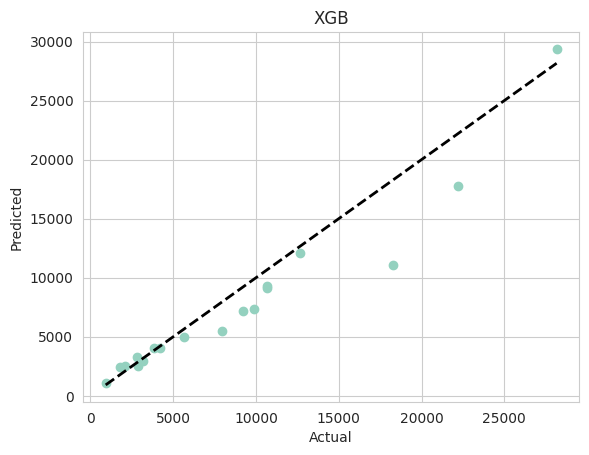

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values for Linear Regression
plt.scatter(y_test, xgb_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGB')
plt.show()

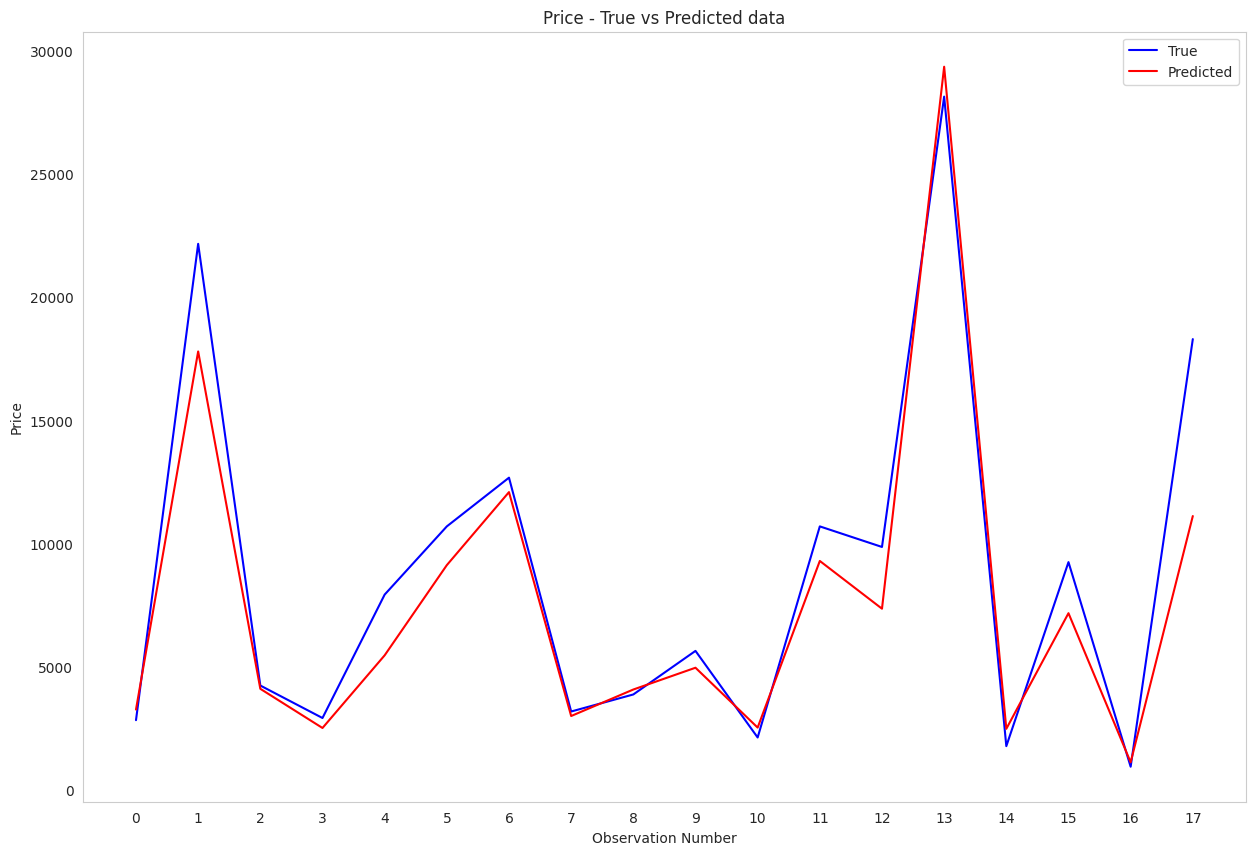

In [ ]:
gap=1

train_seg=y_test[::gap]
pred_seg=xgb_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(15,10))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

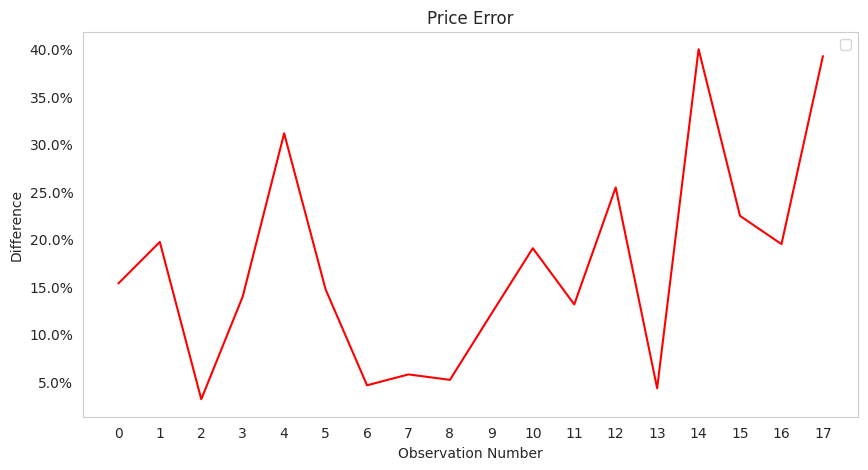

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(xgb_pred, columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = y_test

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

gap=1
x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

# **Gradient Boosting**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=365)

x_test = x_test.drop(x_test.index[5])
x_test = x_test.reset_index(drop=True)

y_test = y_test.drop(y_test.index[5])
y_test = y_test.reset_index(drop=True)

r2=0

gboost_model = GradientBoostingRegressor()

param_grid = {
     'n_estimators':[100, 200, 300, 500 , 1000],
    'learning_rate': [0.01, 0.1, 0.2, 0.05],
    'max_depth':[3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=gboost_model, param_grid=param_grid, error_score='raise',cv=10)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the full training set

best_gboost_model = GradientBoostingRegressor(learning_rate= best_params['learning_rate'], max_depth= best_params['max_depth'], n_estimators=best_params['n_estimators'], min_samples_split=best_params['min_samples_split'],min_samples_leaf=best_params['min_samples_leaf'])


best_gboost_model.fit(x_train, y_train)

y_pred = best_gboost_model.predict(x_test)

  # print(i , metrics.mean_absolute_error(y_test, y_pred) , metrics.mean_squared_error(y_test, y_pred) , np.sqrt(metrics.mean_squared_error(y_test, y_pred)) , metrics.r2_score(y_test,y_pred))

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score",metrics.r2_score(y_test,y_pred))

gbt_pred=y_pred

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
MAE: 1716.5694091284213
MSE: 8988858.688787324
RMSE: 2998.1425397714706
r2_score 0.8352646896285258


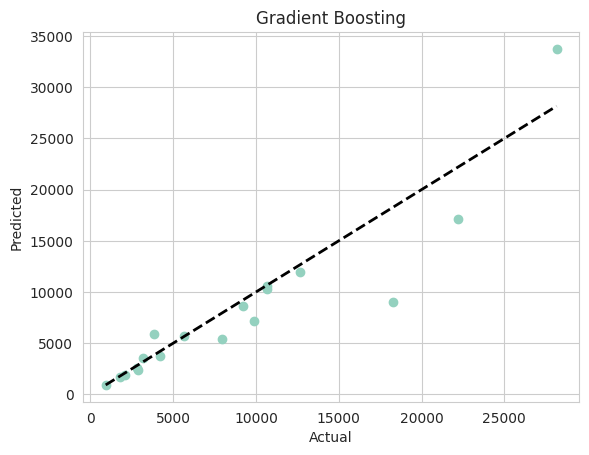

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values for Linear Regression
plt.scatter(y_test, gbt_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting')
plt.show()

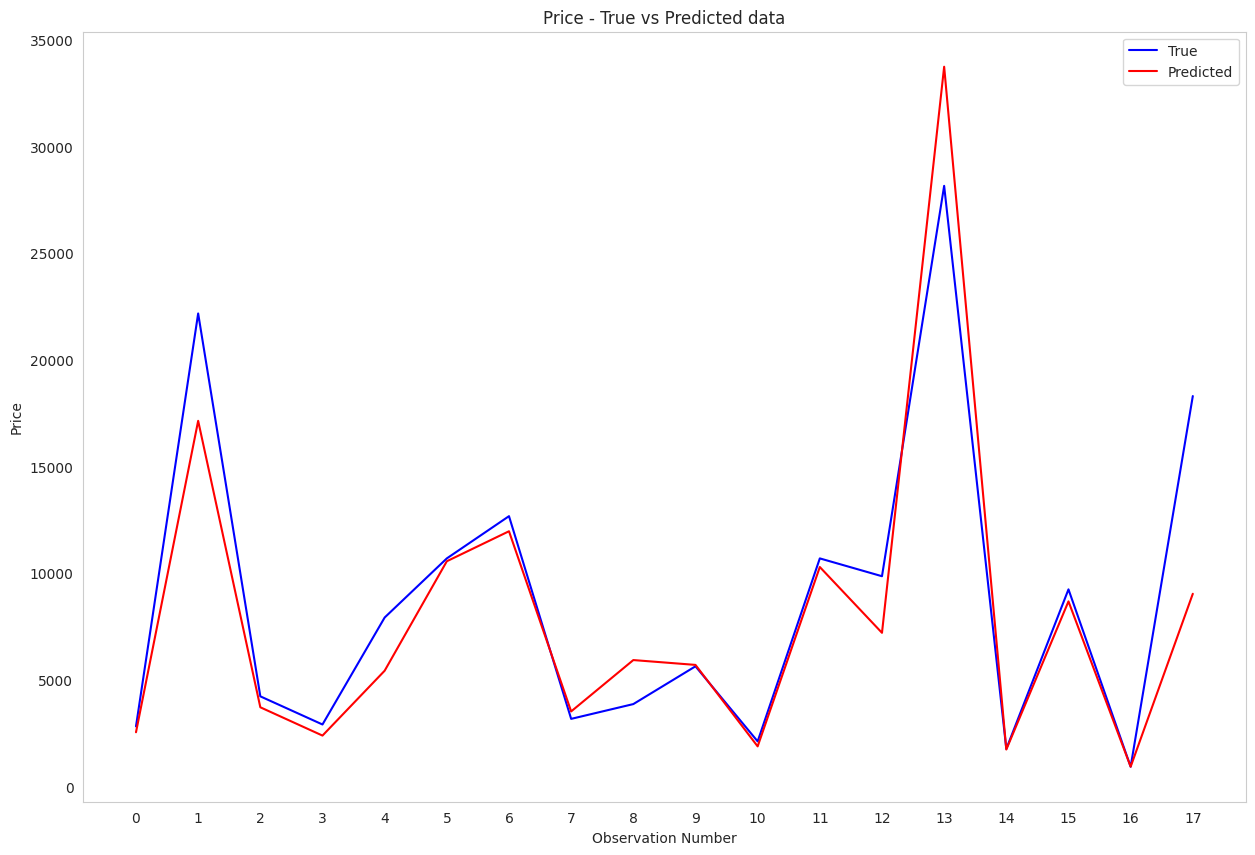

In [ ]:
gap=1

train_seg=y_test[::gap]
pred_seg=gbt_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(15,10))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

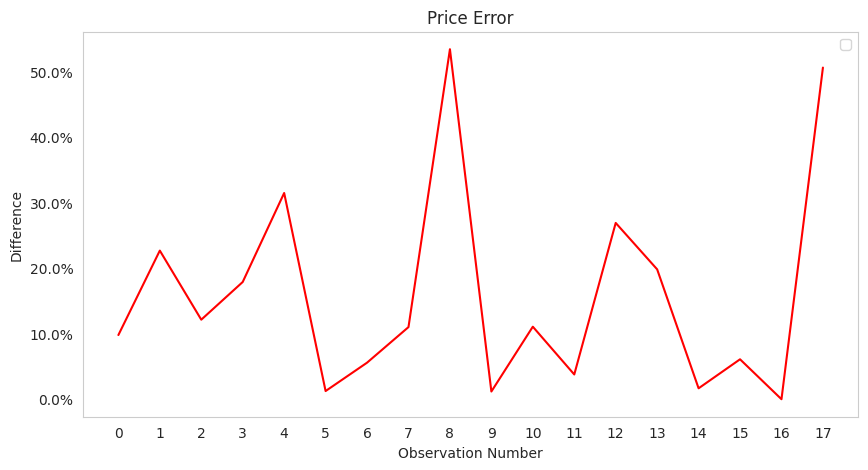

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(gbt_pred, columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = y_test

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

gap=1
x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()

# **Linear Regression**

In [ ]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
lr_pred = lr.predict(x_test)

r_squared = r2_score(y_test,lr_pred)
rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
print("R_squared :",r_squared)
print("RMSE :",rmse)


lr1=LinearRegression()
# i=100
# lr1.fit(x_train,y_train)
for i in range(100):
  lr1.fit(x_train,y_train)
lr1_pred=lr1.predict(x_test)
r_squared = r2_score(y_test,lr1_pred)
rmse = np.sqrt(mean_squared_error(y_test,lr1_pred))
print("R_squared :",r_squared)
print("RMSE :",rmse)
# Regularization, Epoch, optimizer
# Andrew NG : House Price Prediction using ML

R_squared : 0.8077681335036784
RMSE : 3238.706692341221
R_squared : 0.8077681335036784
RMSE : 3238.706692341221


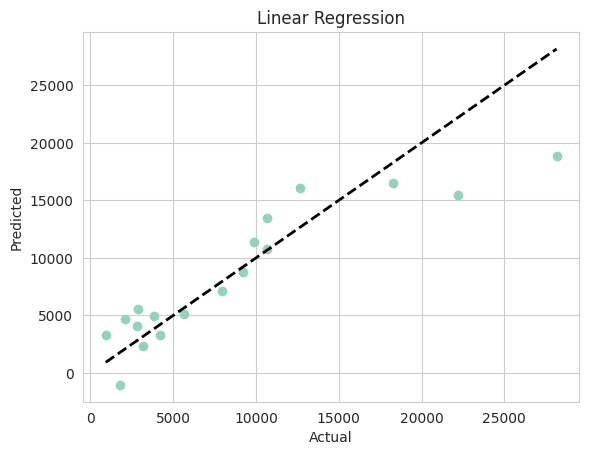

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values for Linear Regression
plt.scatter(y_test, lr_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

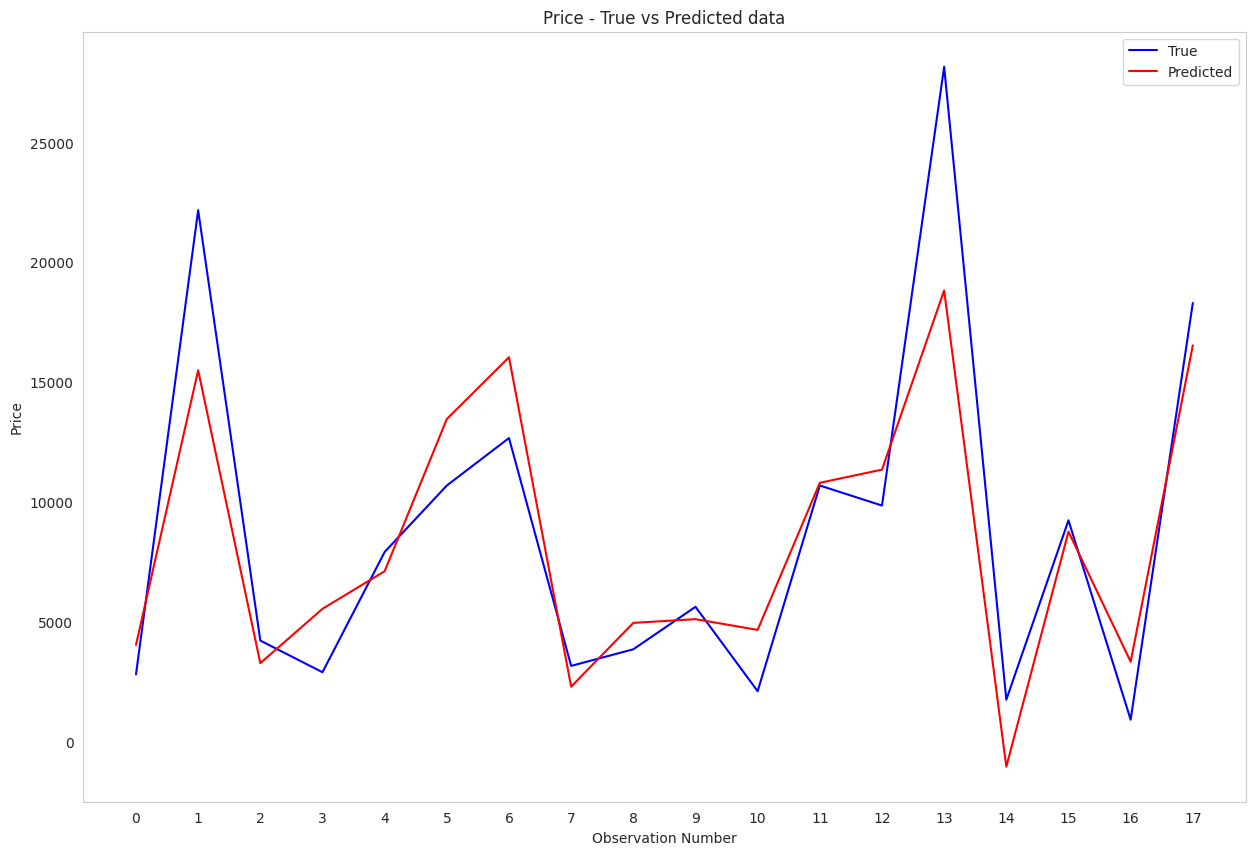

In [ ]:
gap=1

train_seg=y_test[::gap]
pred_seg=lr_pred[::gap]

# number_of_observations=len(y_train)
x_ax =np.arange(len(train_seg))*gap
# print(x_ax)
plt.figure(figsize=(15,10))
plt.plot(x_ax, train_seg, label="True" , color='blue')
plt.plot(x_ax, pred_seg, label="Predicted" , color='red')
plt.title("Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(x_ax)
plt.legend()
plt.grid()
plt.show()

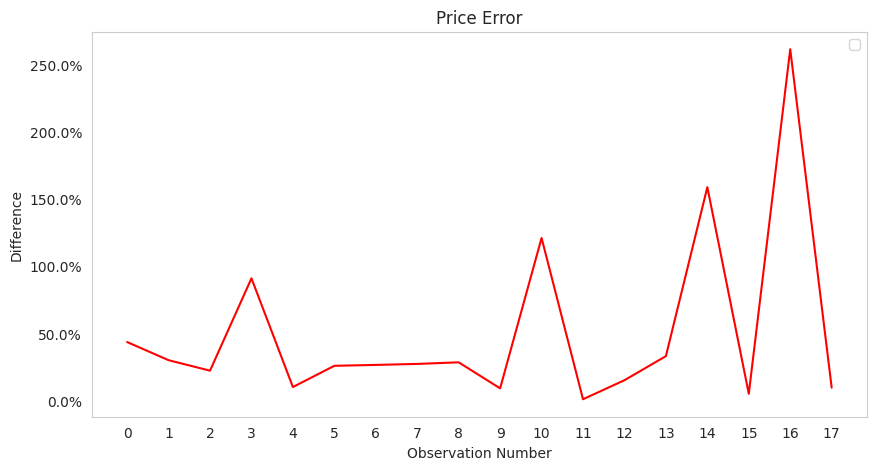

In [ ]:
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(lr_pred, columns=['Predicted Price'])

y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = y_test

df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute((df_ev['Residual']/df_ev['Actual Price'])*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

gap=1
x_ax =np.arange(len(train_seg))*gap
y_ax=df_ev['Difference%'][::gap]

import matplotlib.ticker as mtick
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_ax , color='red')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.title("Price Error")
plt.xlabel('Observation Number')
plt.ylabel('Difference')
plt.xticks(x_ax)
plt.yticks()
plt.legend()
plt.grid()
plt.show()